# 建立CNN实现猫狗识别
基于dataset\training_set数据，根据提供的结构，建立CNN模型，识别图片中的猫、狗，计算预测准确率  
1、识别图片中的猫、狗，计算dataset\test_set测试数据预测准确率  
2、从网站下载猫狗图片，对其进行预测  

In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
#load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255)
training_set = train_datagen.flow_from_directory('./dataset/training_set',
                                                 target_size=(50, 50),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [2]:
#确认输入数据标签
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
#set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential()
#卷积层
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2, 2)))
#卷积层
model.add(Conv2D(32, (3, 3), activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2, 2)))
#flattening layer
model.add(Flatten())
#FC layer
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [4]:
#configure the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
__________________________

![cnn_structure](images/structure.jpg)

In [5]:
#training the model
model.fit_generator(training_set, epochs=15)


Epoch 1/15
250/250 [==============================] - 49s 195ms/step - loss: 0.6706 - accuracy: 0.5847
Epoch 2/15
250/250 [==============================] - 41s 163ms/step - loss: 0.6015 - accuracy: 0.6796
Epoch 3/15
250/250 [==============================] - 39s 157ms/step - loss: 0.5328 - accuracy: 0.7336
Epoch 4/15
250/250 [==============================] - 38s 153ms/step - loss: 0.4796 - accuracy: 0.7645
Epoch 5/15
250/250 [==============================] - 40s 161ms/step - loss: 0.4323 - accuracy: 0.7960
Epoch 6/15
250/250 [==============================] - 44s 174ms/step - loss: 0.3682 - accuracy: 0.8314
Epoch 7/15
250/250 [==============================] - 45s 182ms/step - loss: 0.3088 - accuracy: 0.8648
Epoch 8/15
250/250 [==============================] - 37s 148ms/step - loss: 0.2407 - accuracy: 0.8984
Epoch 9/15
250/250 [==============================] - 44s 176ms/step - loss: 0.1707 - accuracy: 0.9333
Epoch 10/15
250/250 [==============================] - 47s 186ms/step - 

In [6]:
#evaluate the model
accuracy_train = model.evaluate_generator(training_set)
test_set = train_datagen.flow_from_directory('./dataset/test_set',
                                             target_size=(50, 50),
                                             batch_size=32,
                                             class_mode='binary')
accuracy_test = model.evaluate_generator(test_set)
print('accuracy_train', accuracy_train)
print('accuracy_test', accuracy_test)

Found 2000 images belonging to 2 classes.
accuracy_train [0.00044208302279002964, 0.999875009059906]
accuracy_test [1.746995449066162, 0.7609999775886536]


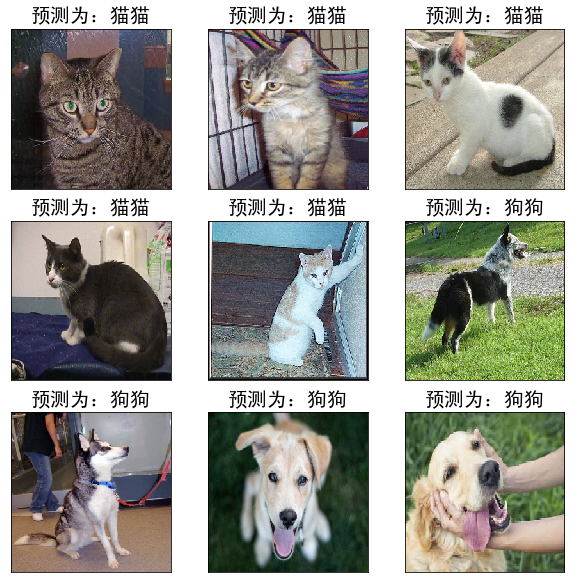

In [14]:
#make prediction on multiple images
import matplotlib as mlp
font2 = {
    'family': 'SimHei',
    'weight': 'normal',
    'size': 20,
}
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
a = [i for i in range(1, 10)]
fig = plt.figure(figsize=(10, 10))
for i in a:
    img_name = 'images/' + str(i) + '.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32') / 255
    img = img.reshape(1, 50, 50, 3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3, 3, i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫猫', font2)
    plt.xticks([])
    plt.yticks([])
plt.show()